In [1]:
import numpy as np
from scipy.io import loadmat
from scipy.optimize import minimize
from sklearn import svm
import matplotlib.pyplot as plt

def preprocess():
    """ 
     Input:
     Although this function doesn't have any input, you are required to load
     the MNIST data set from file 'mnist_all.mat'.

     Output:
     train_data: matrix of training set. Each row of train_data contains 
       feature vector of a image
     train_label: vector of label corresponding to each image in the training
       set
     validation_data: matrix of training set. Each row of validation_data 
       contains feature vector of a image
     validation_label: vector of label corresponding to each image in the 
       training set
     test_data: matrix of training set. Each row of test_data contains 
       feature vector of a image
     test_label: vector of label corresponding to each image in the testing
       set
    """

    mat = loadmat('mnist_all.mat')  # loads the MAT object as a Dictionary

    n_feature = mat.get("train1").shape[1]
    n_sample = 0
    for i in range(10):
        n_sample = n_sample + mat.get("train" + str(i)).shape[0]
    n_validation = 1000
    n_train = n_sample - 10 * n_validation

    # Construct validation data
    validation_data = np.zeros((10 * n_validation, n_feature))
    for i in range(10):
        validation_data[i * n_validation:(i + 1) * n_validation, :] = mat.get("train" + str(i))[0:n_validation, :]

    # Construct validation label
    validation_label = np.ones((10 * n_validation, 1))
    for i in range(10):
        validation_label[i * n_validation:(i + 1) * n_validation, :] = i * np.ones((n_validation, 1))

    # Construct training data and label
    train_data = np.zeros((n_train, n_feature))
    train_label = np.zeros((n_train, 1))
    temp = 0
    for i in range(10):
        size_i = mat.get("train" + str(i)).shape[0]
        train_data[temp:temp + size_i - n_validation, :] = mat.get("train" + str(i))[n_validation:size_i, :]
        train_label[temp:temp + size_i - n_validation, :] = i * np.ones((size_i - n_validation, 1))
        temp = temp + size_i - n_validation

    # Construct test data and label
    n_test = 0
    for i in range(10):
        n_test = n_test + mat.get("test" + str(i)).shape[0]
    test_data = np.zeros((n_test, n_feature))
    test_label = np.zeros((n_test, 1))
    temp = 0
    for i in range(10):
        size_i = mat.get("test" + str(i)).shape[0]
        test_data[temp:temp + size_i, :] = mat.get("test" + str(i))
        test_label[temp:temp + size_i, :] = i * np.ones((size_i, 1))
        temp = temp + size_i

    # Delete features which don't provide any useful information for classifiers
    sigma = np.std(train_data, axis=0)
    index = np.array([])
    for i in range(n_feature):
        if (sigma[i] > 0.001):
            index = np.append(index, [i])
    train_data = train_data[:, index.astype(int)]
    validation_data = validation_data[:, index.astype(int)]
    test_data = test_data[:, index.astype(int)]

    # Scale data to 0 and 1
    train_data /= 255.0
    validation_data /= 255.0
    test_data /= 255.0

    return train_data, train_label, validation_data, validation_label, test_data, test_label


def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

train_data, train_label, validation_data, validation_label, test_data, test_label = preprocess()

# number of classes
n_class = 10
# number of training samples
n_train = train_data.shape[0]
# number of features
n_feature = train_data.shape[1]

train_data_height = train_data.shape[0]
train_data_width = train_data.shape[1]
train_label_width = train_label.shape[1]
random_indices = np.random.choice(range(train_data_height), 10000, replace=False)
train_data_svm = np.empty((10000, train_data_width))
train_label_svm = np.empty((10000, train_label_width), dtype=np.uintc)
for index, randi in enumerate(random_indices):
    train_data_svm[index] = train_data[randi]
    train_label_svm[index] = train_label[randi]
train_label_svm = train_label_svm.flatten()

In [2]:
print("\nFor RBF")
clf = svm.SVC()
clf.fit(train_data_svm, train_label_svm)
print(f"SVM Training done")
predicted_label = clf.predict(train_data_svm)
print(f"\nTrain set Accuracy: {100* np.mean((predicted_label == train_label_svm).astype(float))}%")
predicted_label = np.matrix(clf.predict(validation_data)).T
print(f"Validation set Accuracy: {100* np.mean((predicted_label == validation_label).astype(float))}%")
predicted_label = np.matrix(clf.predict(test_data)).T
print(f"Test set Accuracy: {100* np.mean((predicted_label == test_label).astype(float))}%")
print("\n")


For RBF
SVM Training done

Train set Accuracy: 98.61999999999999%
Validation set Accuracy: 96.16%
Test set Accuracy: 96.33%




In [3]:
print("\nFor Linear")
clf = svm.SVC(kernel="linear")
clf.fit(train_data_svm, train_label_svm)
print(f"SVM Training done")
predicted_label = clf.predict(train_data_svm)
print(f"\nTrain set Accuracy: {100* np.mean((predicted_label == train_label_svm).astype(float))}%")
predicted_label = np.matrix(clf.predict(validation_data)).T
print(f"Validation set Accuracy: {100* np.mean((predicted_label == validation_label).astype(float))}%")
predicted_label = np.matrix(clf.predict(test_data)).T
print(f"Test set Accuracy: {100* np.mean((predicted_label == test_label).astype(float))}%")
print("\n")


For Linear
SVM Training done

Train set Accuracy: 99.72999999999999%
Validation set Accuracy: 91.66%
Test set Accuracy: 91.34%





In [3]:
print("\nFor RBF with gamma 1")
clf = svm.SVC(kernel="rbf", gamma = 1.0)
clf.fit(train_data_svm, train_label_svm)
print(f"SVM Training done")
predicted_label = clf.predict(train_data_svm)
print(f"\nTrain set Accuracy: {100* np.mean((predicted_label == train_label_svm).astype(float))}%")
predicted_label = np.matrix(clf.predict(validation_data)).T
print(f"Validation set Accuracy: {100* np.mean((predicted_label == validation_label).astype(float))}%")
predicted_label = np.matrix(clf.predict(test_data)).T
print(f"Test set Accuracy: {100* np.mean((predicted_label == test_label).astype(float))}%")
print("\n")


For RBF with gamma 1
SVM Training done

Train set Accuracy: 100.0%
Validation set Accuracy: 10.0%
Test set Accuracy: 11.360000000000001%





For RBF with varying C

C=1
SVM Training done

Train set Accuracy: 98.61999999999999%
Validation set Accuracy: 96.16%
Test set Accuracy: 96.33%



C=10
SVM Training done

Train set Accuracy: 100.0%
Validation set Accuracy: 96.85000000000001%
Test set Accuracy: 96.97%



C=20
SVM Training done

Train set Accuracy: 100.0%
Validation set Accuracy: 96.84%
Test set Accuracy: 96.94%



C=30
SVM Training done

Train set Accuracy: 100.0%
Validation set Accuracy: 96.84%
Test set Accuracy: 96.94%



C=40
SVM Training done

Train set Accuracy: 100.0%
Validation set Accuracy: 96.84%
Test set Accuracy: 96.94%



C=50
SVM Training done

Train set Accuracy: 100.0%
Validation set Accuracy: 96.84%
Test set Accuracy: 96.94%



C=60
SVM Training done

Train set Accuracy: 100.0%
Validation set Accuracy: 96.84%
Test set Accuracy: 96.94%



C=70
SVM Training done

Train set Accuracy: 100.0%
Validation set Accuracy: 96.84%
Test set Accuracy: 96.94%



C=80
SVM Training done

Train set Accuracy: 100.0%
Valid

Text(0.5, 1.0, 'For RBF with varying C')

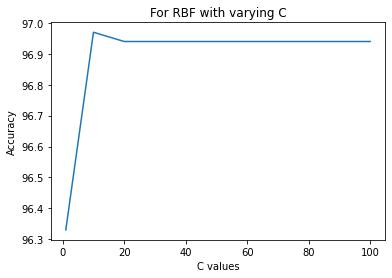

In [9]:
print("\nFor RBF with varying C")
C = [1, 10, 20, 30, 40, 50, 60 ,70, 80, 90, 100]
training_acc = []
validation_acc = []
test_acc = []

for i in C:
    print(f"\nC={i}")
    clf = svm.SVC(kernel="rbf", C=i)
    clf.fit(train_data_svm, train_label_svm)
    print(f"SVM Training done")
    predicted_label = clf.predict(train_data_svm)
    print(f"\nTrain set Accuracy: {100* np.mean((predicted_label == train_label_svm).astype(float))}%")
    training_acc.append(100* np.mean((predicted_label == train_label_svm).astype(float)))
    predicted_label = np.matrix(clf.predict(validation_data)).T
    print(f"Validation set Accuracy: {100* np.mean((predicted_label == validation_label).astype(float))}%")
    validation_acc.append(100* np.mean((predicted_label == validation_label).astype(float)))
    predicted_label = np.matrix(clf.predict(test_data)).T
    print(f"Test set Accuracy: {100* np.mean((predicted_label == test_label).astype(float))}%")
    test_acc.append(100* np.mean((predicted_label == test_label).astype(float)))
    print("\n")
    

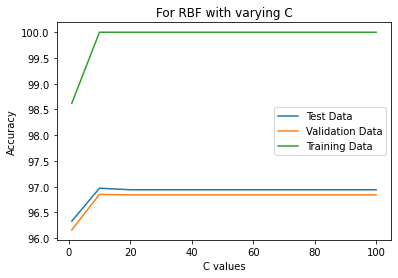

In [14]:
plt.plot(C, test_acc, label="Test Data")
plt.plot(C, validation_acc, label="Validation Data")
plt.plot(C, training_acc, label="Training Data")
plt.xlabel("C values")
plt.ylabel("Accuracy")
plt.title("For RBF with varying C")
plt.legend()

import pickle
pickle.dump(test_acc, open( "rbf_varyC_test.p", "wb" ))
pickle.dump(validation_acc, open( "rbf_varyC_valid.p", "wb" ))
pickle.dump(training_acc, open( "rbf_varyC_train.p", "wb" ))

In [5]:
print("\nFor RBF with varying gamma")

C = [1, 10, 20, 30, 40, 50, 60 ,70, 80, 90, 100]
gamma = np.linspace(0.1, 1, 10)
training_acc = []
validation_acc = []
test_acc = []

for i in gamma:
    for j in C:
        print(f"\nFor RBF with gamma={i}, C={j}")
        clf = svm.SVC(kernel="rbf", gamma = i, C=j)
        clf.fit(train_data_svm, train_label_svm)
        print(f"SVM Training done")
        predicted_label = clf.predict(train_data_svm)
        print(f"\nTrain set Accuracy: {100* np.mean((predicted_label == train_label_svm).astype(float))}%")
        training_acc.append(100* np.mean((predicted_label == train_label_svm).astype(float)))

        predicted_label = np.matrix(clf.predict(validation_data)).T
        print(f"Validation set Accuracy: {100* np.mean((predicted_label == validation_label).astype(float))}%")
        validation_acc.append(100* np.mean((predicted_label == validation_label).astype(float)))

        predicted_label = np.matrix(clf.predict(test_data)).T
        print(f"Test set Accuracy: {100* np.mean((predicted_label == test_label).astype(float))}%")
        test_acc.append(100* np.mean((predicted_label == test_label).astype(float)))
        print("\n")


For RBF with varying gamma

For RBF with gamma=0.1
SVM Training done

Train set Accuracy: 99.99%
Validation set Accuracy: 87.71%
Test set Accuracy: 88.24%



For RBF with gamma=0.21250000000000002
SVM Training done

Train set Accuracy: 100.0%
Validation set Accuracy: 48.04%
Test set Accuracy: 48.74%



For RBF with gamma=0.325
SVM Training done

Train set Accuracy: 100.0%
Validation set Accuracy: 24.169999999999998%
Test set Accuracy: 26.009999999999998%



For RBF with gamma=0.4375
SVM Training done

Train set Accuracy: 100.0%
Validation set Accuracy: 18.7%
Test set Accuracy: 20.4%



For RBF with gamma=0.55
SVM Training done

Train set Accuracy: 100.0%
Validation set Accuracy: 16.73%
Test set Accuracy: 18.459999999999997%



For RBF with gamma=0.6625
SVM Training done

Train set Accuracy: 100.0%
Validation set Accuracy: 16.11%
Test set Accuracy: 17.849999999999998%



For RBF with gamma=0.775
SVM Training done

Train set Accuracy: 100.0%
Validation set Accuracy: 16.03%
Test set Accu

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])